# Heart Disease Analysis - Interm Results

- Nathan Garrity (8767594)
- Jun He
- Mohamed Benkhial 
- Haoyang Li

Our use case for our dataset is to determine **Risk of Heart Disease Prediction**. We can use predictive modeling techniques to assess which variables are the most significant predictors of heart disease and extract patterns from the data. The heart disease dataset is a numerical dataset with 13 key attributes, including age, Systolic blood pressure, Cholesterol, and Gender, used primarily to predict the presence of heart disease. The **Null Hypothesis** is that patient features have no relationship with heart disease. Whereas the **Alternative Hypothesis** is that patient features significantly influences heart disease. 

Our dataset can be used to predict heart disease risk by analyzing factors like age, sex, cholesterol levels, chest pain types, and exercise-induced symptoms. A machine learning model can help identify high-risk individuals based on these symtoms, aiding early diagnosis and personalized treatment plans.

There are 3 types of input features:

- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

#### Data Columns (Source: [Cardiovascular Disease dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?resource=download)):

### Hypothesis Testing

- **Null Hypothesis**: Selected features have no relationship with heart disease.
- **Alternative Hypothesis**: Selected features significantly influences heart disease.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class HeartDiseaseAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.df_filtered = None

    def load_data(self):
        """Load data from the provided CSV file path."""
        self.df = pd.read_csv(self.file_path)
        print(f"Data loaded successfully with {self.df.shape[0]} rows and {self.df.shape[1]} columns.")
        return self.df

    def fill_missing_values_by_group(self, df, group_col, categorical_cols, numerical_cols):

        # Fill missing values in numerical columns with the mean, grouped by group_col
        df[numerical_cols] = df.groupby(group_col)[numerical_cols].transform(lambda x: x.fillna(x.mean()))

        # Fill missing values in categorical columns with the mode, grouped by group_col
        for col in categorical_cols:
            df[col] = df.groupby(group_col)[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

        # Verify if there are any remaining missing values
        print("\nRemaining missing values:")
        print(df.isnull().sum())

In [2]:
# Using functions in HeartDiseaseAnalysis class
analysis = HeartDiseaseAnalysis('data/patient_data.csv')
df = analysis.load_data() 

Data loaded successfully with 70000 rows and 13 columns.


In [3]:
df.shape

(70000, 13)

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


## Data Preparation
### Handling Missing Values

In [5]:
# Identify missing values in each column
missing_values = analysis.df.isnull().sum()
print('Missing values in each column:')
missing_values

Missing values in each column:


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
missing_value_ratio = analysis.df.isnull().mean()

print("Missing Value Ratio for each column:")
print(missing_value_ratio)

threshold = 0.4

columns_to_drop = missing_value_ratio[missing_value_ratio > threshold].index
df_dropped = analysis.df.drop(columns=columns_to_drop)
analysis.df = df_dropped

print("Columns dropped due to high missing value ratio:")
print(columns_to_drop)

print("\nDataFrame after handling missing values:")
df_dropped.head()

Missing Value Ratio for each column:
id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64
Columns dropped due to high missing value ratio:
Index([], dtype='object')

DataFrame after handling missing values:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [7]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Set visual style
sns.set(style="whitegrid")


In [8]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
5,8,21914,1,151,67,120,80,2,2,0,0,0,0
6,9,22113,1,157,93,130,80,3,1,0,0,1,0
7,12,22584,2,178,95,130,90,3,3,0,0,1,1
8,13,17668,1,158,71,110,70,1,1,0,0,1,0
9,14,19834,1,164,68,110,60,1,1,0,0,0,0


Age-standardized death rate adjusts mortality rates for differences in age structure between populations, providing a more accurate comparison of mortality rates when populations have different age distributions. 

### Data Wrangling

In [ ]:
# Convert age from days to years
df["age"] = (df["age"] / 365).astype(int)

# Map gender values: 1 -> Male, 2 -> Female
df["gender"] = df["gender"].map({1: "Female", 2: "Male"})

# Check for outliers in height, weight, and blood pressure
height_range = (120, 220)
weight_range = (30, 200) 
bp_range = (50, 250) 

# Filter out extreme values
df = df[(df["height"].between(*height_range)) &
        (df["weight"].between(*weight_range)) &
        (df["ap_hi"].between(*bp_range)) &
        (df["ap_lo"].between(*bp_range))]

# Ensure cholesterol and glucose are categorical (1, 2, 3)
df["cholesterol"] = df["cholesterol"].astype("category")
df["gluc"] = df["gluc"].astype("category")

# Confirm changes
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
Index: 68699 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           68699 non-null  int64   
 1   age          68699 non-null  int64   
 2   gender       68699 non-null  object  
 3   height       68699 non-null  int64   
 4   weight       68699 non-null  int64   
 5   ap_hi        68699 non-null  int64   
 6   ap_lo        68699 non-null  int64   
 7   cholesterol  68699 non-null  category
 8   gluc         68699 non-null  category
 9   smoke        68699 non-null  int64   
 10  alco         68699 non-null  int64   
 11  active       68699 non-null  int64   
 12  cardio       68699 non-null  int64   
dtypes: category(2), int64(10), object(1)
memory usage: 6.4+ MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,Male,168,62,110,80,1,1,0,0,1,0
1,1,55,Female,156,85,140,90,3,1,0,0,1,1
2,2,51,Female,165,64,130,70,3,1,0,0,0,1
3,3,48,Male,169,82,150,100,1,1,0,0,1,1
4,4,47,Female,156,56,100,60,1,1,0,0,0,0


#### Objective Features

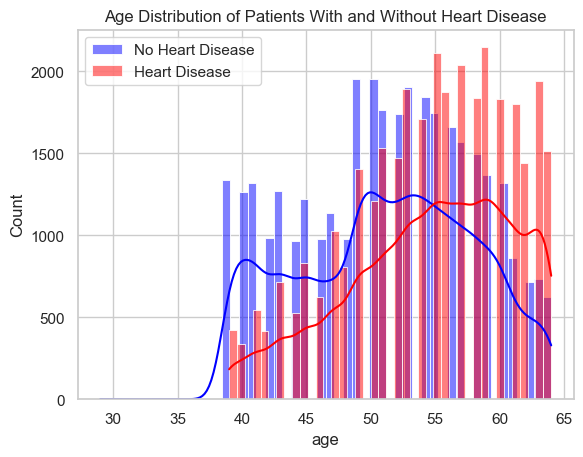

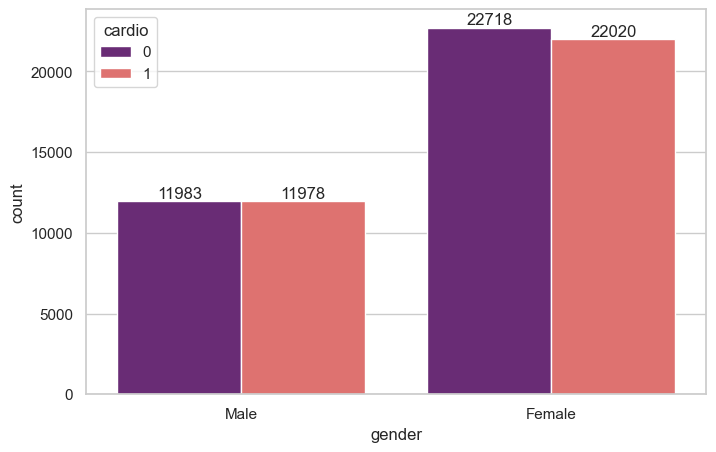

In [10]:
sns.histplot(df[df["cardio"] == 0]["age"], color="blue", label="No Heart Disease", kde=True, alpha=0.5)
sns.histplot(df[df["cardio"] == 1]["age"], color="red", label="Heart Disease", kde=True, alpha=0.5)
plt.legend()
plt.title("Age Distribution of Patients With and Without Heart Disease")
plt.show()

plt.figure(figsize=(8,5))
ax = sns.countplot(data = df,x='gender',hue='cardio',palette = 'magma')
for x in ax.containers:
    ax.bar_label(x)

plt.show()



#### Examination Features

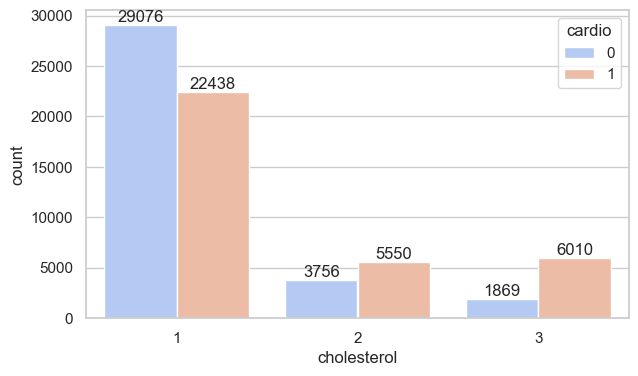

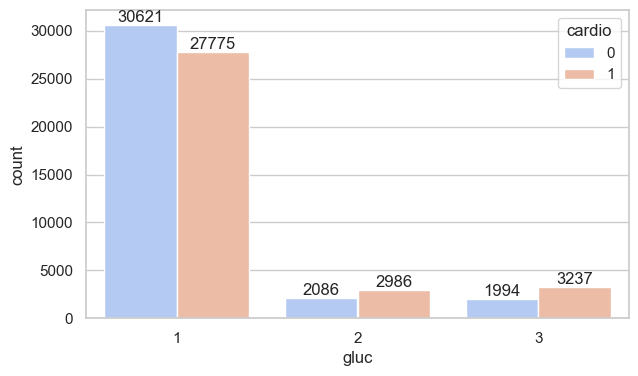

In [11]:
plt.figure(figsize=(7,4))
bx = sns.countplot(x='cholesterol',hue='cardio',data = df,palette = 'coolwarm')
for p in bx.containers:
    bx.bar_label(p)
plt.show()

plt.figure(figsize=(7,4))
cx = sns.countplot(x='gluc',hue='cardio',data = df,palette = 'coolwarm')
for b in cx.containers:
    cx.bar_label(b)
plt.show()

#### Subjective Features

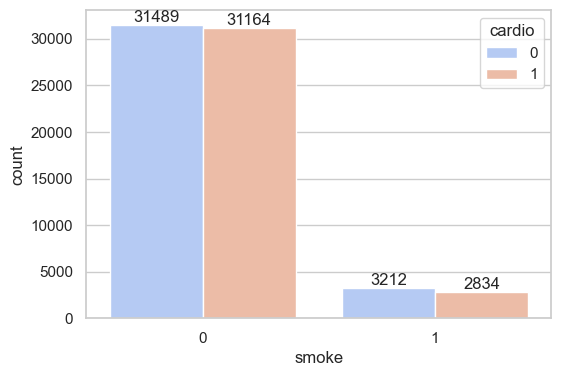

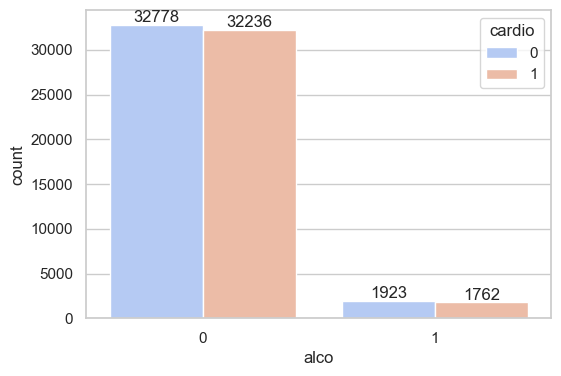

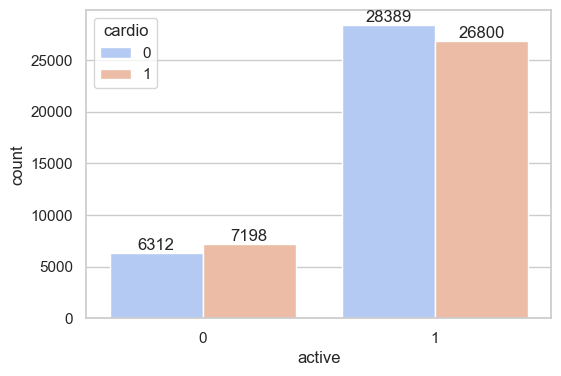

In [12]:
plt.figure(figsize=(6,4))
dx = sns.countplot(x='smoke',hue='cardio',data = df,palette = 'coolwarm')
for b in dx.containers:
    dx.bar_label(b)
plt.show()

plt.figure(figsize=(6,4))
ex = sns.countplot(x='alco',hue='cardio',data = df,palette = 'coolwarm')
for b in ex.containers:
    ex.bar_label(b)
plt.show()

plt.figure(figsize=(6,4))
fx = sns.countplot(x='active',hue='cardio',data = df,palette = 'coolwarm')
for b in fx.containers:
    fx.bar_label(b)
plt.show()

#### Chi-Squared Test
Helps us determine whether there is an association between sex and chest pain type (cp). This can help understand if certain chest pain types are more prevalent in one gender.

In [17]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['cholesterol'])

# Performs the Chi-Squared test on the two columns
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic (χ²): {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies: \n{expected}")
print(f"Observed frequencies: \n{contingency_table}")

# Hypothesis testing
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. gender and cholesterol are not independent (there is an association between them)")
else:
    print("Fail to reject the null hypothesis. gender and cholesterol are independent (there is no association between them)")

Chi-squared statistic (χ²): 93.12687636239735
P-Value: 5.994538302044329e-21
Degrees of Freedom: 2
Expected frequencies: 
[[33546.82501929  6060.23126974  5130.94371097]
 [17967.17498071  3245.76873026  2748.05628903]]
Observed frequencies: 
cholesterol      1     2     3
gender                        
Female       33042  6257  5439
Male         18472  3049  2440
Reject the null hypothesis. gender and cholesterol are not independent (there is an association between them)


In [ ]:
# Map gender values: 1 -> Male, 2 -> Female
df["gender"] = df["gender"].map({"Female": 1, "Male": 2})

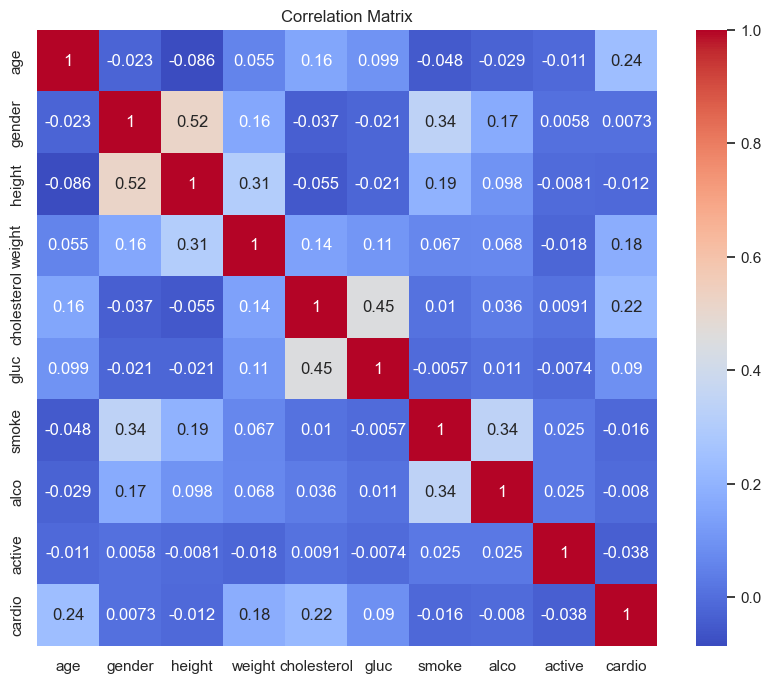

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pearson's correlation
correlation_matrix = df[['age', 'gender', 'height', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Control Group (A): Patients who receive traditional healthcare screening methods without AI-based risk detection.​

Test Group (B): Patients who undergo screening using the AI-driven early detection model.​

Studies such as Mayo Clinic’s AI-enhanced ECGs and predictive analytics for cardiac events show strong evidence that AI can significantly improve early detection accuracy, indicating we can safely keep each score similar.

## Logistic Classification

For our logistic regression model, 0 represents a paient does not have heart disease, while 1 means a patient does have heart disease.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

selected_features = ['age', 'weight', 'cholesterol', 'ap_hi', 'ap_lo', 'gluc', 'smoke', 'alco', 'active']
X = df[selected_features]
y = df['cardio']

X = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
log_model = sm.Logit(y_train, X_train).fit()

y_pred = log_model.predict(X_test)
y_pred_class = (y_pred >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_class))

Optimization terminated successfully.
         Current function value: 0.560076
         Iterations 6
Accuracy: 0.72654051431344


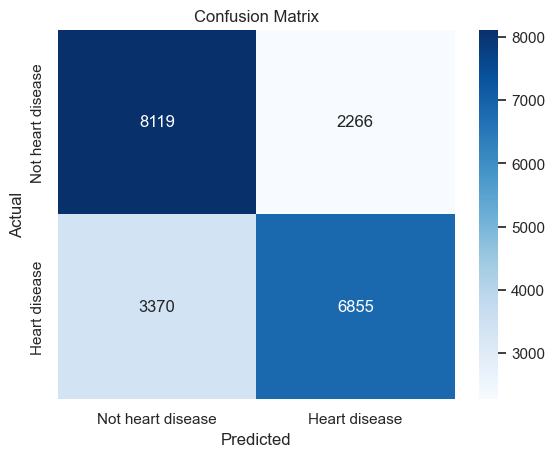

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_class)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not heart disease', 'Heart disease'], yticklabels=['Not heart disease', 'Heart disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Components of the Confusion Matrix

**Cell Values:**

- 7952 (True Negatives): The model correctly predicted "Not Heart Disease" for 7952 instances.
- 7194 (True Positives): The model correctly predicted "Heart Disease" for 7194 instances.
- 2509 (False Positives): The model incorrectly predicted "Heart Disease" for instances that are actually "Not Heart Disease."
- 3345 (False Negatives): The model incorrectly predicted "Not Heart Disease" for instances that are actually "Heart Disease."

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74     10385
           1       0.75      0.67      0.71     10225

    accuracy                           0.73     20610
   macro avg       0.73      0.73      0.73     20610
weighted avg       0.73      0.73      0.73     20610



#### **Overall Metrics**

Accuracy: The ratio of correctly predicted observations to the total observations.

- Value: 0.72
- Interpretation: The model correctly predicts 72% of the instances in the dataset.

In [ ]:
print(log_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                48089
Model:                          Logit   Df Residuals:                    48079
Method:                           MLE   Df Model:                            9
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.1919
Time:                        00:32:25   Log-Likelihood:                -26933.
converged:                       True   LL-Null:                       -33330.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -11.9827      0.147    -81.304      0.000     -12.272     -11.694
age             0.0519      0.002     32.072      0.000       0.049       0.055
weight          0.0095      0.001     12.023    

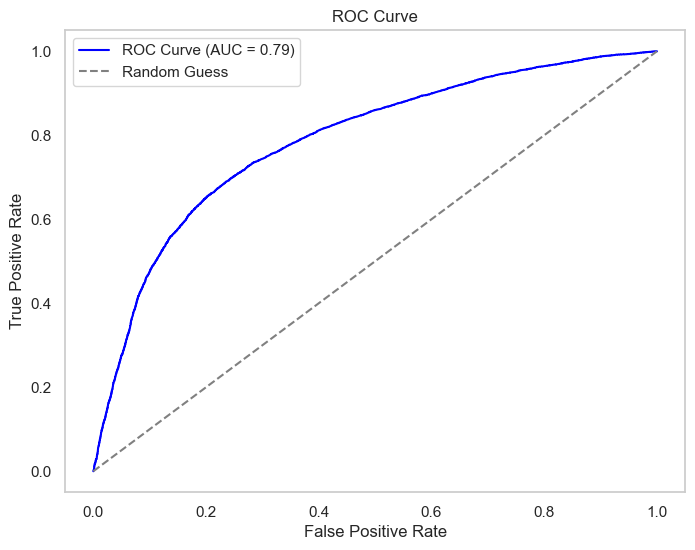

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

X_test_selected = sm.add_constant(X_test[selected_features])
y_pred_prob = log_model.predict(X_test_selected)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [ ]:
y_prob_positive = log_model.predict(X_test)

y_prob_negative = 1 - y_prob_positive
 
# Combine into a 2D array for both classes
import numpy as np
y_prob = np.column_stack((y_prob_negative, y_prob_positive))
 
print("Predicted probabilities for the first 5 instances (Negative and Positive classes):")
print(y_prob[:5])

Predicted probabilities for the first 5 instances (Negative and Positive classes):
[[0.65239319 0.34760681]
 [0.50882251 0.49117749]
 [0.29770625 0.70229375]
 [0.18092302 0.81907698]
 [0.72023408 0.27976592]]


In [ ]:
# Get predicted probabilities
y_pred_probs = log_model.predict(X_test)

# Interpreting probabilities
X_test['Predicted Probability'] = y_pred_probs
X_test.head()

,const,age,weight,cholesterol,ap_hi,ap_lo,gluc,smoke,alco,active,Predicted Probability
39756,1.0,52,68,1,120,80,1,0,0,1,0.347607
35376,1.0,62,76,1,120,80,1,0,0,1,0.491177
31606,1.0,61,100,1,130,90,1,0,0,1,0.702294
8959,1.0,54,96,1,150,90,1,0,0,1,0.819077
48945,1.0,47,62,1,120,80,1,0,0,1,0.279766


In [ ]:
X_test['Risk Level'] = pd.cut(
    y_pred_probs,
    bins=[0, 0.3, 0.7, 1],
    labels=['Low', 'Medium', 'High']
)

X_test.head()

,const,age,weight,cholesterol,ap_hi,ap_lo,gluc,smoke,alco,active,Predicted Probability,Risk Level
39756,1.0,52,68,1,120,80,1,0,0,1,0.347607,Medium
35376,1.0,62,76,1,120,80,1,0,0,1,0.491177,Medium
31606,1.0,61,100,1,130,90,1,0,0,1,0.702294,High
8959,1.0,54,96,1,150,90,1,0,0,1,0.819077,High
48945,1.0,47,62,1,120,80,1,0,0,1,0.279766,Low


### Conclusion

In conclusion, we have determined that based on our analysis that there are key factors that significantly contribute to heart disease. Factors such as age, cholesterol, weight, glucose, and others all significantly indicate weather a patient has a risk of heart disease.

The predicted probabilities can help designate the risk level to each patients who don't suffer from heart disease currently, in hopes of saving lives down the line.